In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.ensemble import RandomForestClassifier

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('credit_score.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

28 cols, 100000 entries, no nulls

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,33.309240,10.764996,14.00000,24.000000,33.000000,42.000000,56.0000
annual_income,100000.0,50505.123439,38299.422075,7005.93000,19342.972500,36999.705000,71683.470000,179987.2800
monthly_inhand_salary,100000.0,4198.771620,3187.494355,303.64542,1626.761700,3096.378400,5961.745000,15204.6340
total_emi_per_month,100000.0,107.043617,130.035096,0.00000,29.197023,66.403020,146.827450,3776.0000
num_bank_accounts,100000.0,5.368800,2.593279,0.00000,3.000000,5.000000,7.000000,11.0000
num_credit_card,100000.0,5.533640,2.067073,0.00000,4.000000,5.000000,7.000000,11.0000
interest_rate,100000.0,14.532080,8.741330,1.00000,7.000000,13.000000,20.000000,34.0000
num_of_loan,100000.0,3.532880,2.446356,0.00000,2.000000,3.000000,5.000000,9.0000
delay_from_due_date,100000.0,21.068780,14.860104,-5.00000,10.000000,18.000000,28.000000,67.0000
num_of_delayed_payment,100000.0,13.334050,6.271409,0.00000,9.000000,14.000000,18.000000,28.0000


In [4]:
df.describe(include='object')

,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6261,3,2,6
top,0x1602,CUS_0xd40,January,Langep,821-00-0265,Lawyer,['No Loan'],Standard,Yes,Low_spent_Small_value_payments
freq,1,8,12500,48,8,7096,11408,45848,59432,27588


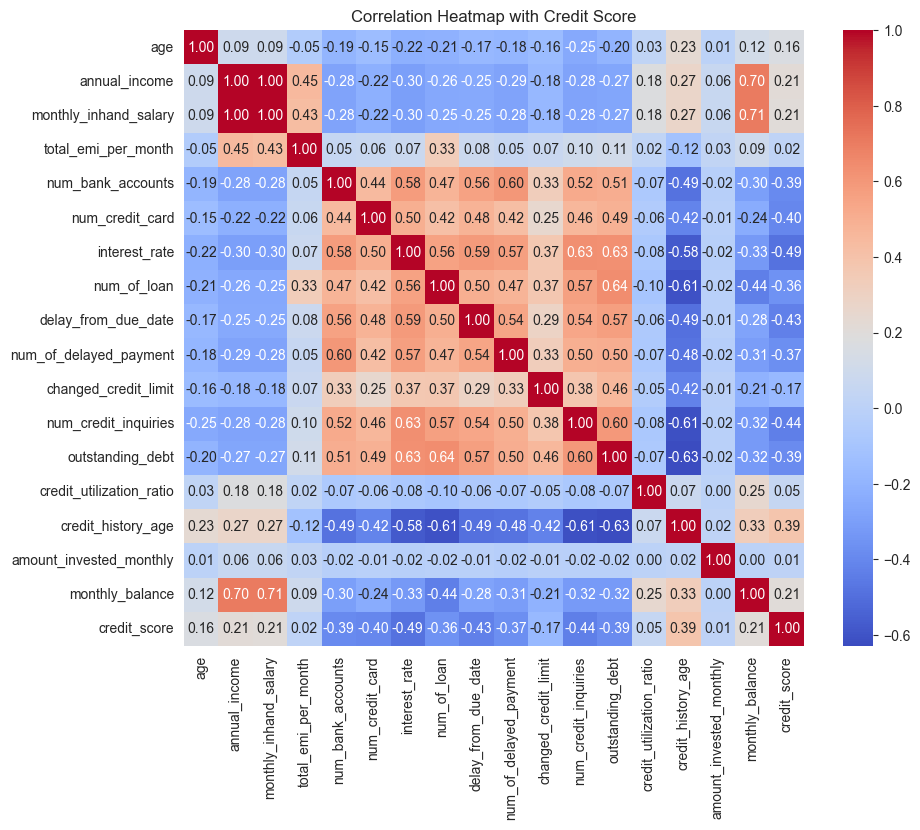

In [5]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap with Credit Score')
plt.show()

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/

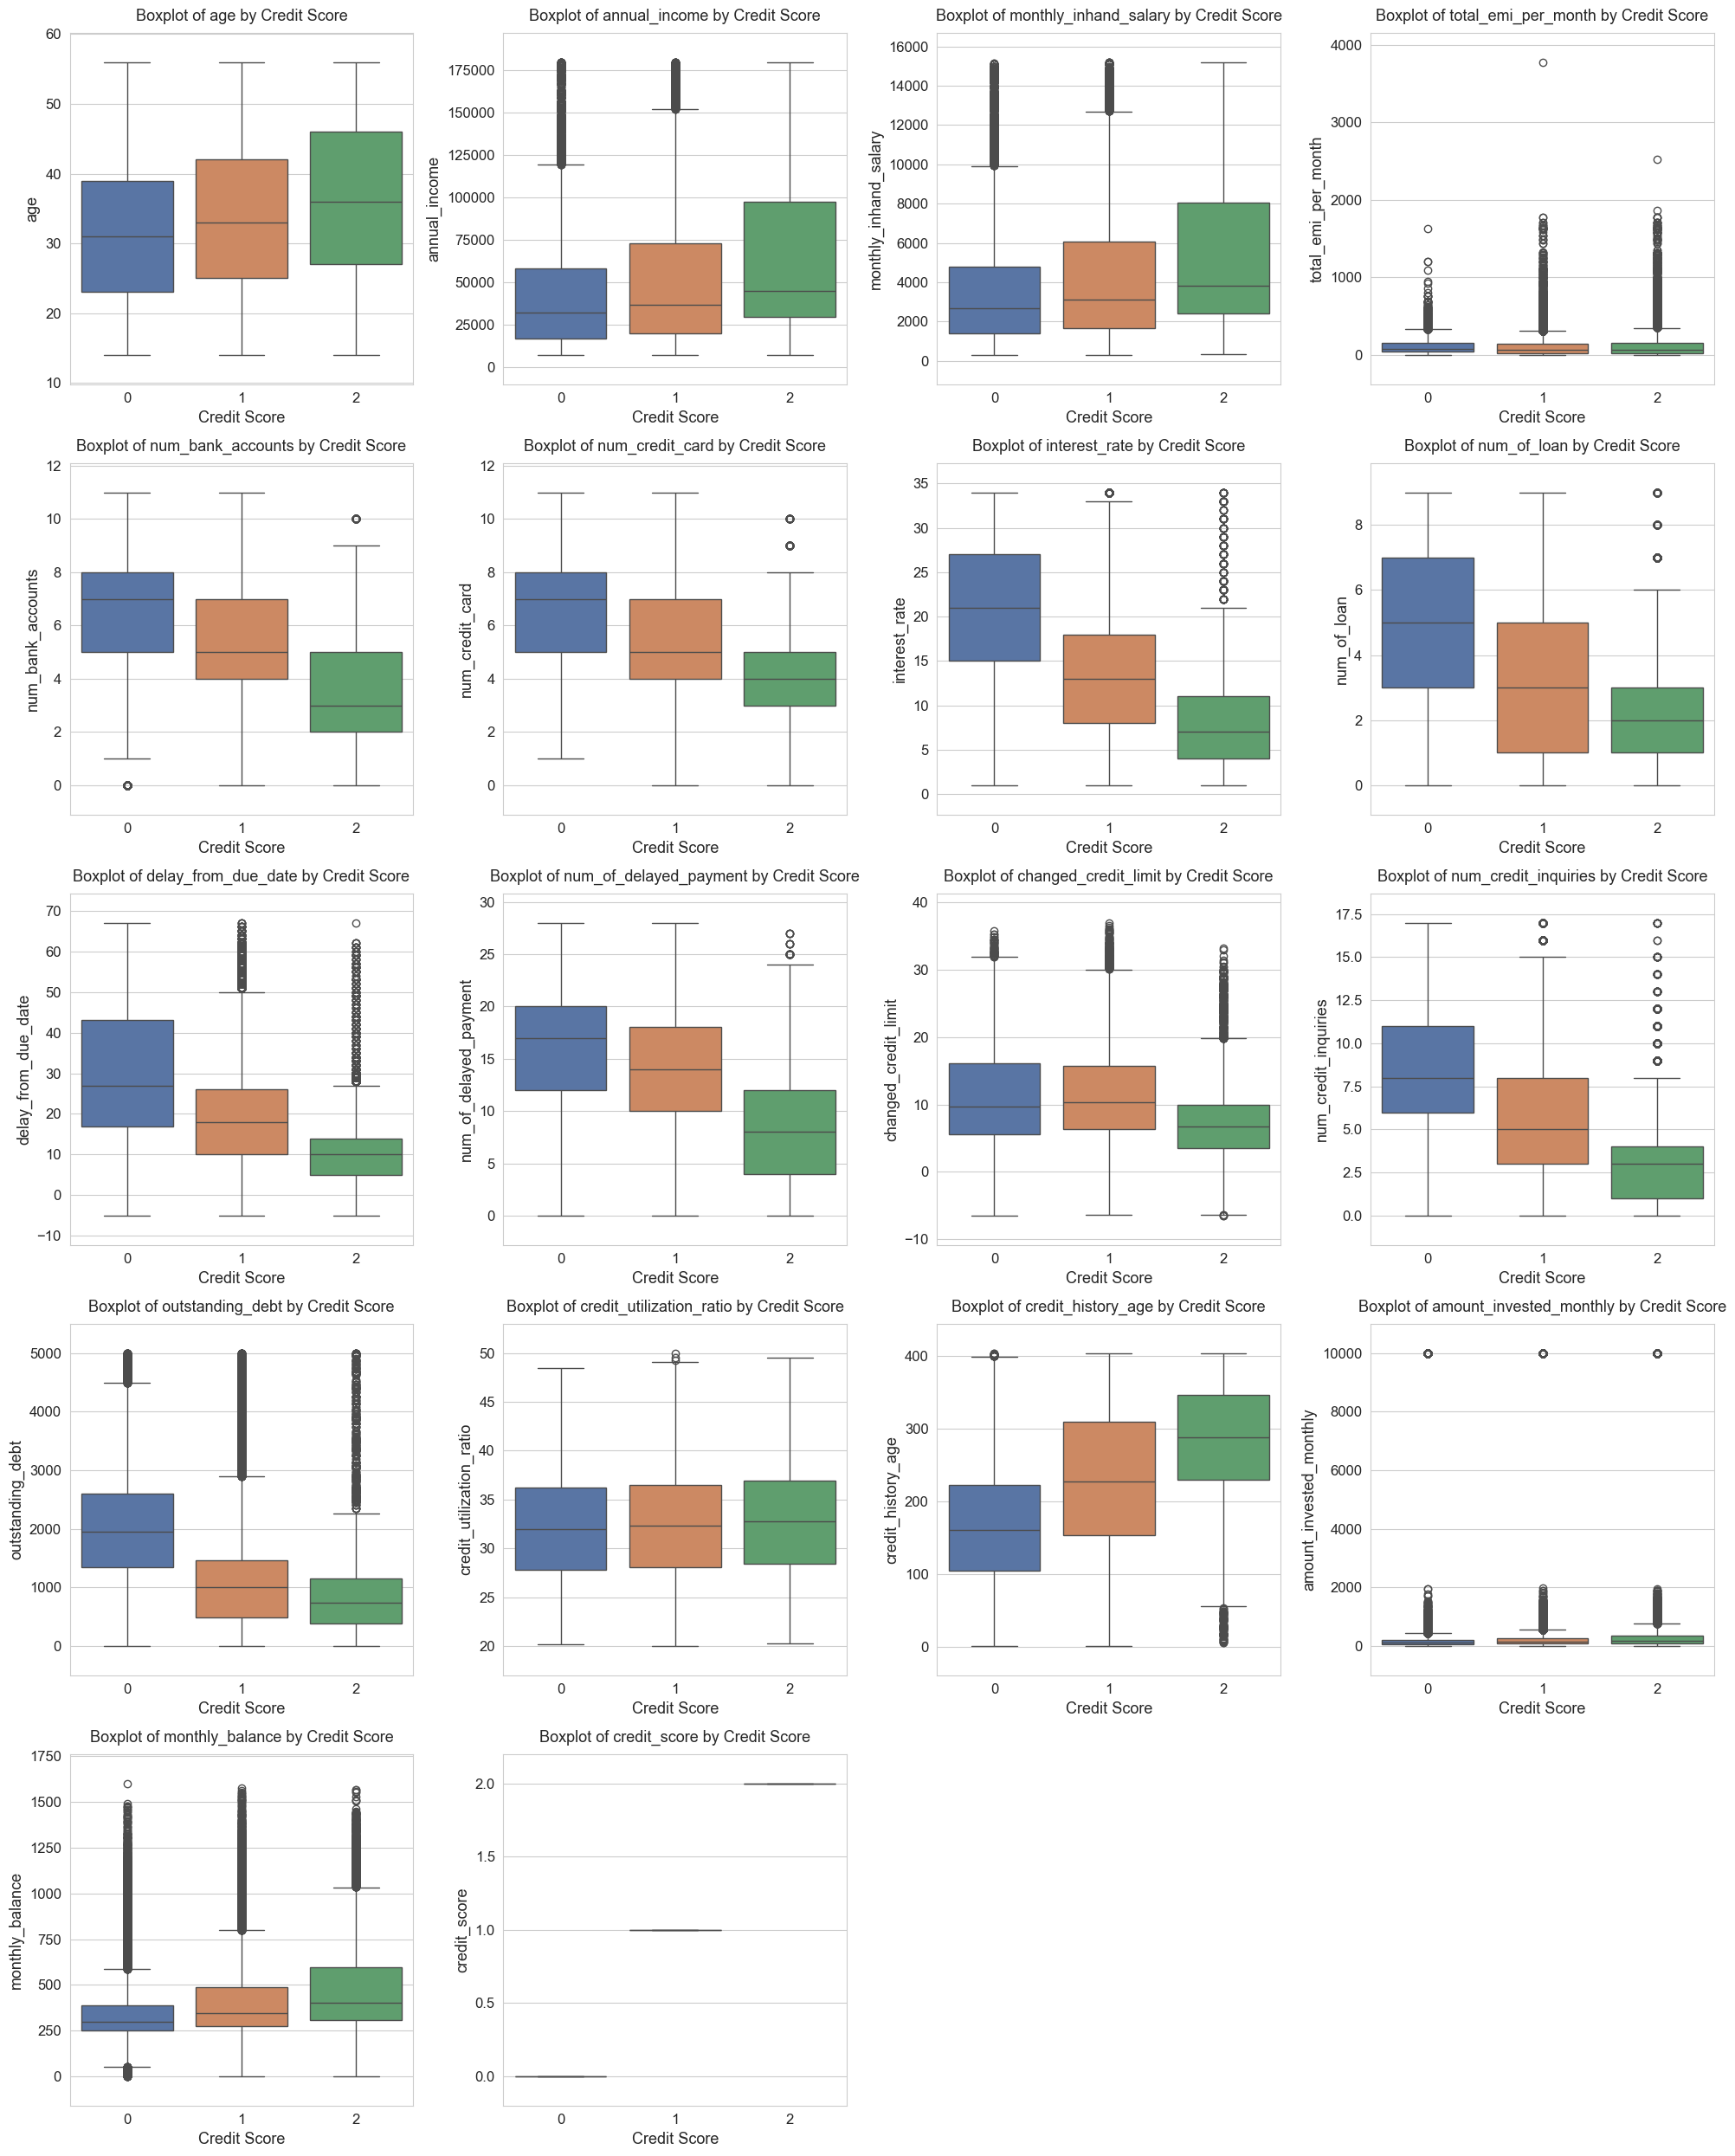

In [7]:
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
                df[col].max() + (df[col].max() - df[col].min()) * 0.1)
    
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

In [8]:
df.groupby('customer_id')['payment_of_min_amount'].nunique().value_counts()

payment_of_min_amount
1    12500
Name: count, dtype: int64

The results indicate that each customer_id has a single, consistent value in the payment_of_min_amount column across all months in the dataset. This means each customer is either marked as 'Yes' or 'No' for every month, with no variation in this field over time.

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2192907853.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)


<Figure size 1200x600 with 0 Axes>

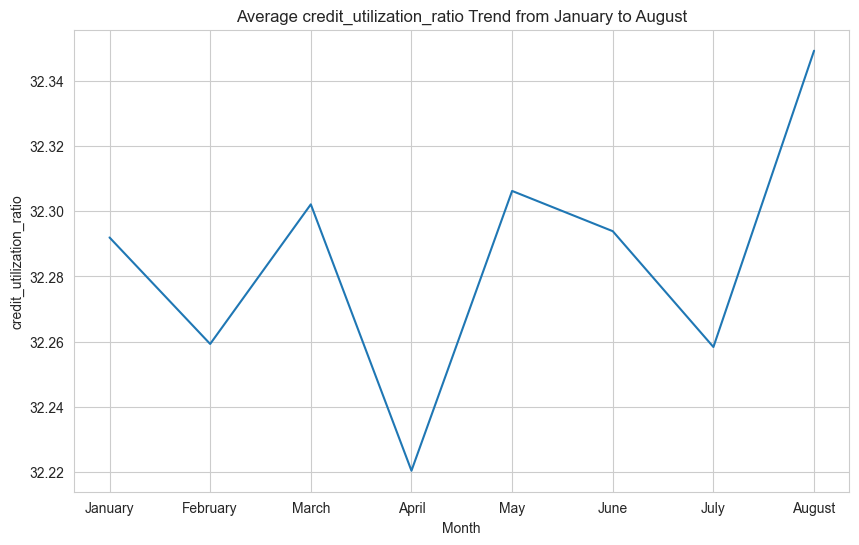

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2192907853.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)


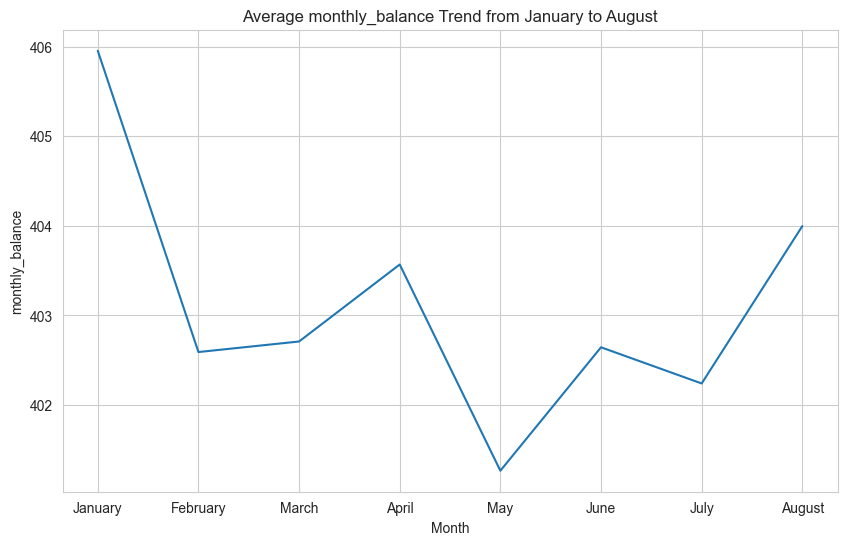

In [9]:
plt.figure(figsize=(12,6))

monthly_features = ['credit_utilization_ratio', 'monthly_balance']

for feature in monthly_features:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)
    plt.title(f'Average {feature} Trend from January to August')
    plt.xlabel('Month')
    plt.ylabel(feature)
    plt.show()



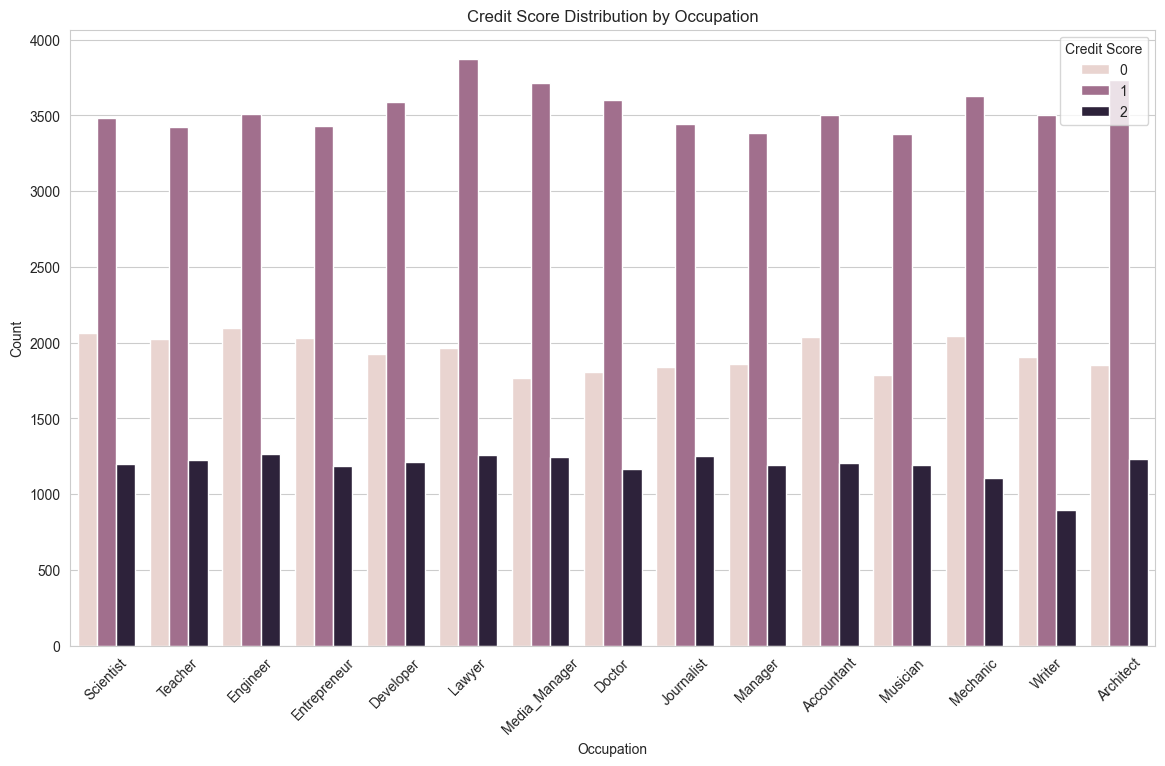

In [10]:
# Distribution of Credit Score across Different Occupations
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='occupation', hue='credit_score')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.show()

In [11]:
def detect_outliers(df, multiplier=1.5):
    outliers = {}
    numeric_df = df.select_dtypes(include=['number'])

    for column in numeric_df.columns:
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outlier_mask = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
        outliers[column] = numeric_df[column][outlier_mask]

    return outliers

outlier_results = detect_outliers(df)

for column, outlier_values in outlier_results.items():
    if not outlier_values.empty:
        print(f'{column} outliers (count: {len(outlier_values)}):')
        print(outlier_values)
    else:
        print(f'No outliers detected in {column}.')

No outliers detected in age.
annual_income outliers (count: 2000):
1728     173196.31
1729     173196.31
1730     173196.31
1731     173196.31
1732     173196.31
           ...    
98931    175718.64
98932    175718.64
98933    175718.64
98934    175718.64
98935    175718.64
Name: annual_income, Length: 2000, dtype: float64
monthly_inhand_salary outliers (count: 2009):
1728     14258.026
1729     14258.026
1730     14258.026
1731     14258.026
1732     14258.026
           ...    
99514    12596.974
99515    12596.974
99516    12596.974
99517    12596.974
99518    12596.974
Name: monthly_inhand_salary, Length: 2009, dtype: float64
total_emi_per_month outliers (count: 5049):
50       911.22015
51       911.22015
52       911.22015
53       911.22015
54       911.22015
           ...    
99955    362.07245
99956    362.07245
99957    362.07245
99958    362.07245
99959    362.07245
Name: total_emi_per_month, Length: 5049, dtype: float64
No outliers detected in num_bank_accounts.
No outlie

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3612049538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3612049538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3612049538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/3612049538.py:9: Futu

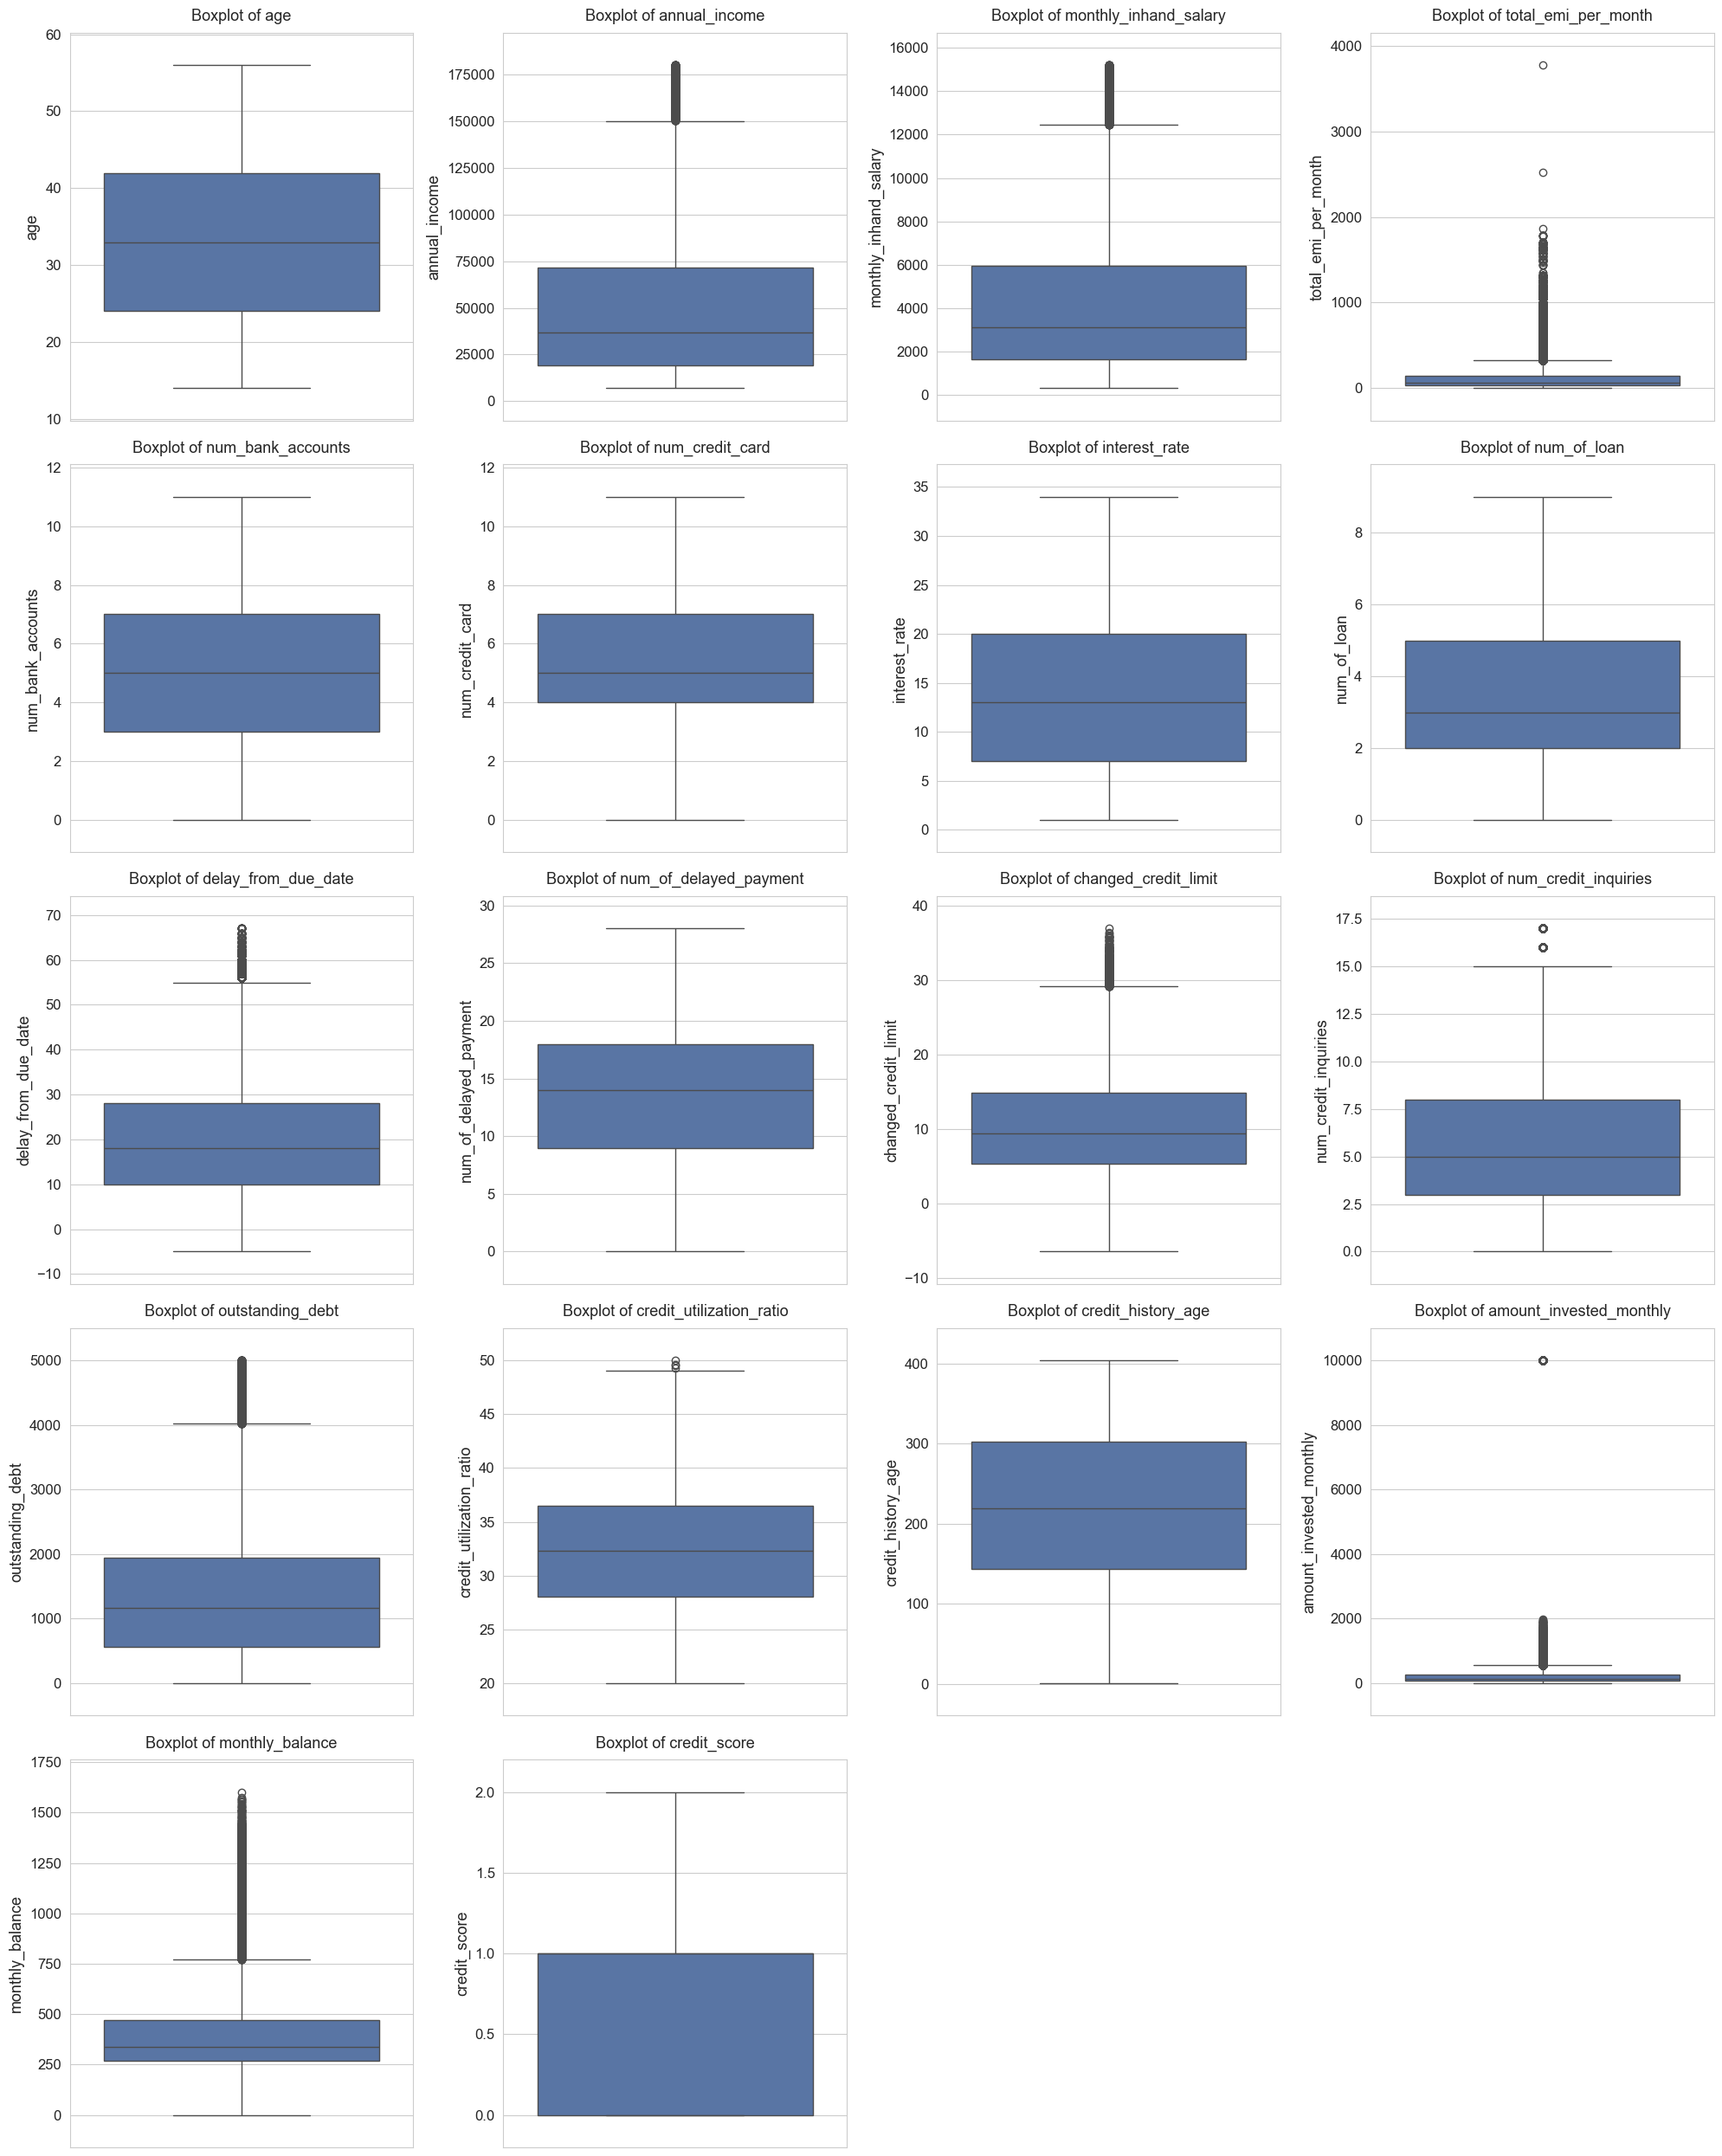

In [13]:
num_cols = 4  # Number of columns for subplots
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Number of rows for subplots thru calculation

plt.figure(figsize=(20, num_rows * 5)) 

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], palette='deep') 
    plt.title(f'Boxplot of {col}', fontsize=13, pad=10)
    plt.xlabel('') 
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

plt.subplots_adjust(wspace=0.4, hspace=0.7)
plt.tight_layout() 
plt.show()


/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


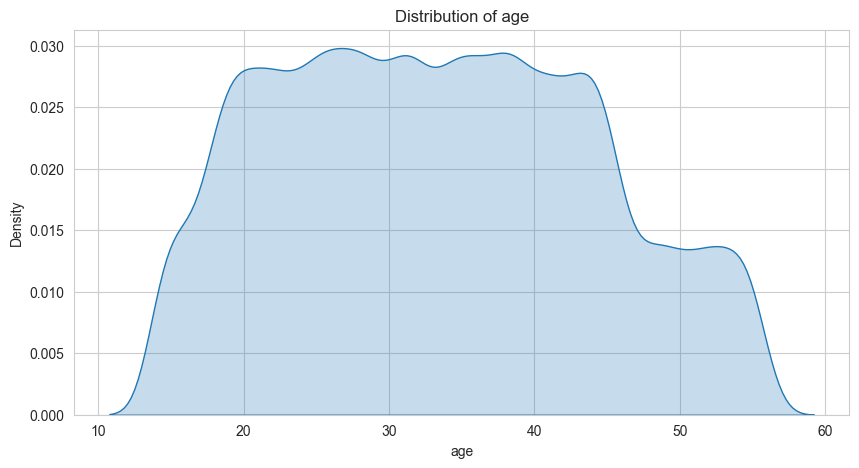

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


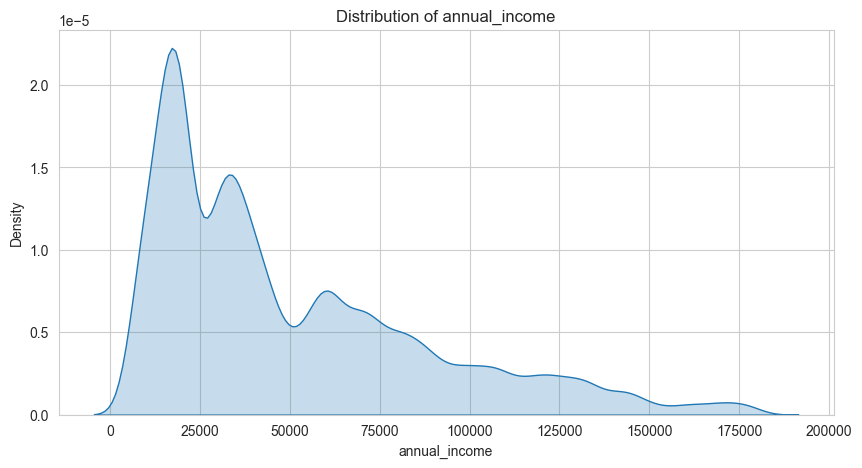

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


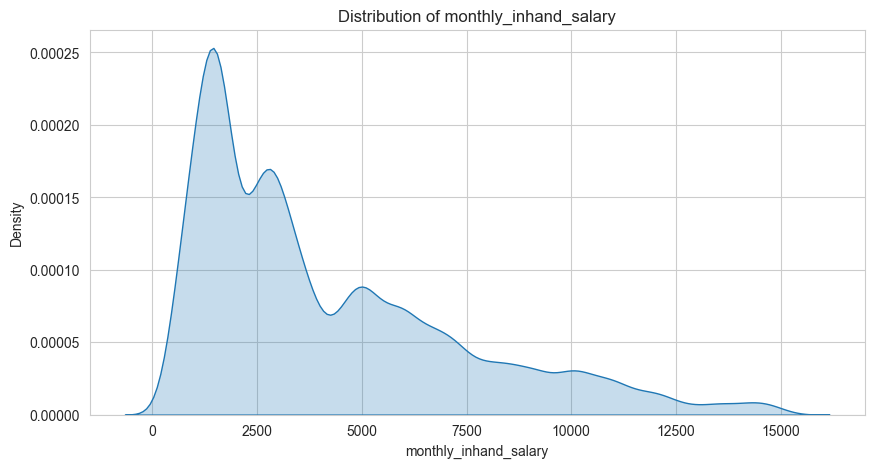

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


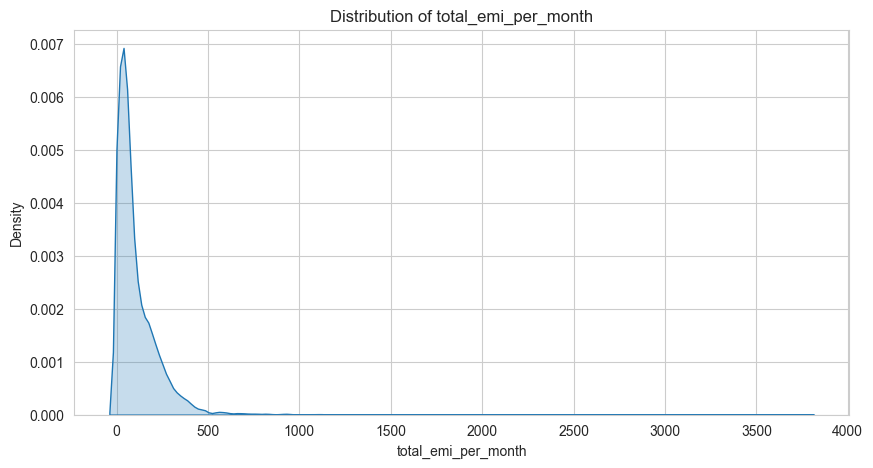

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


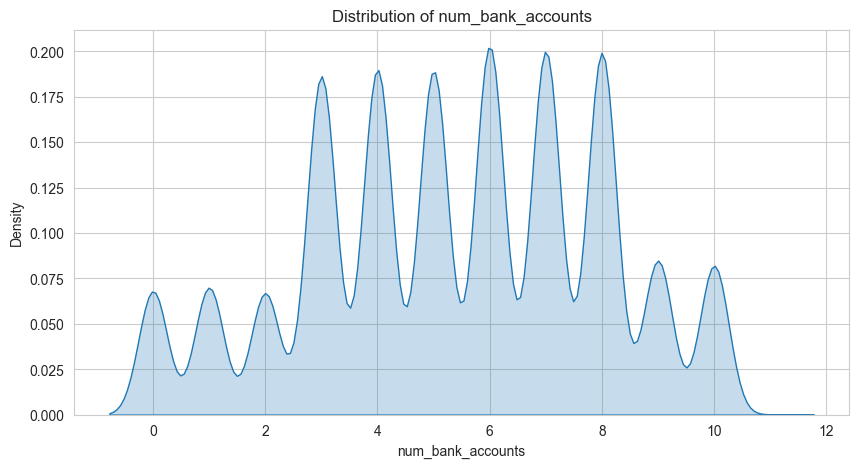

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


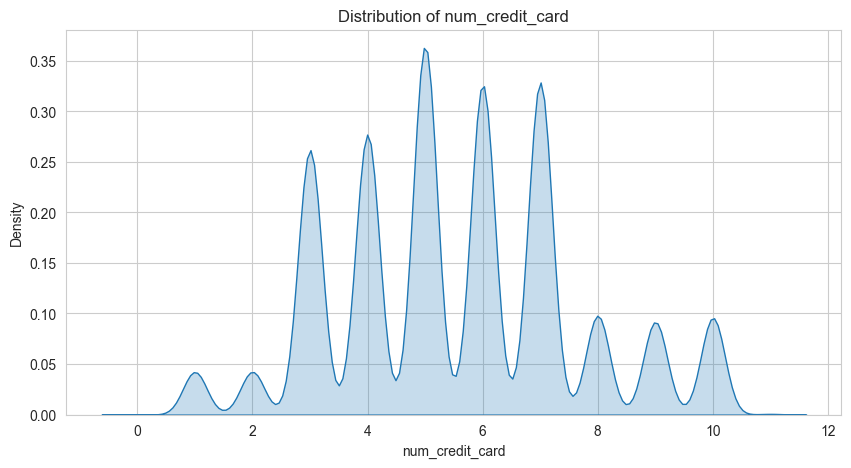

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


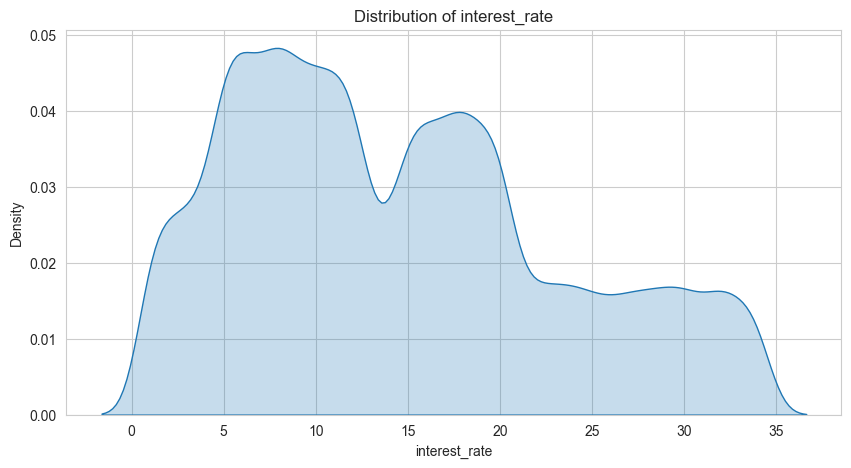

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


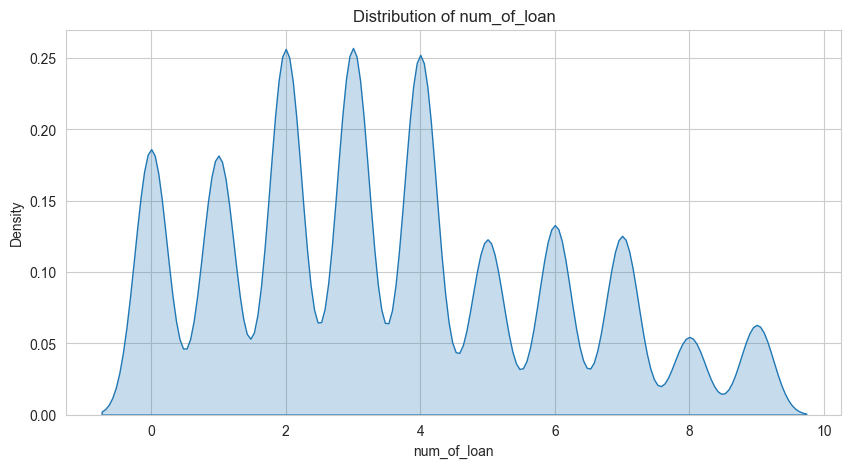

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


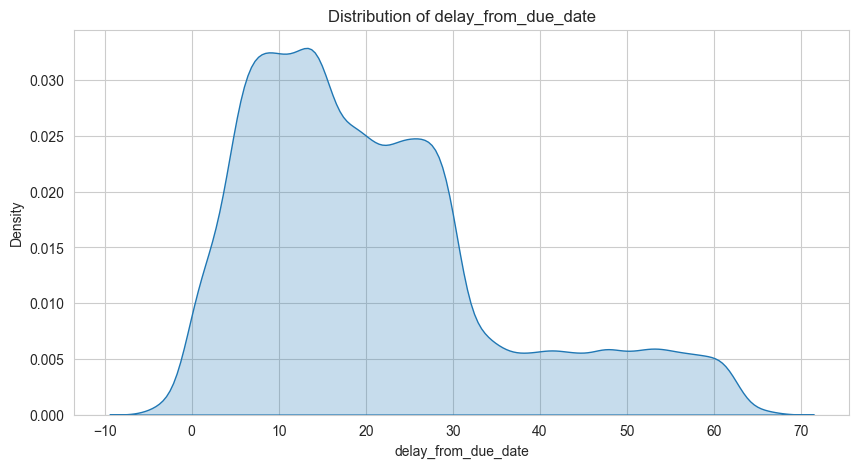

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


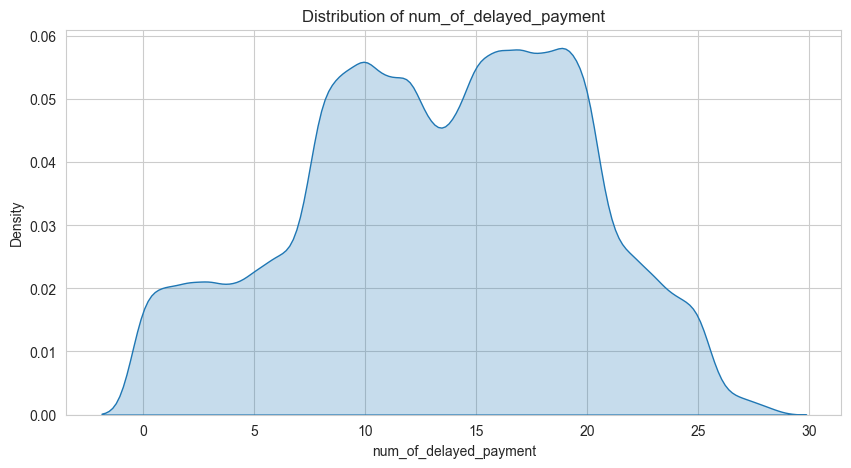

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


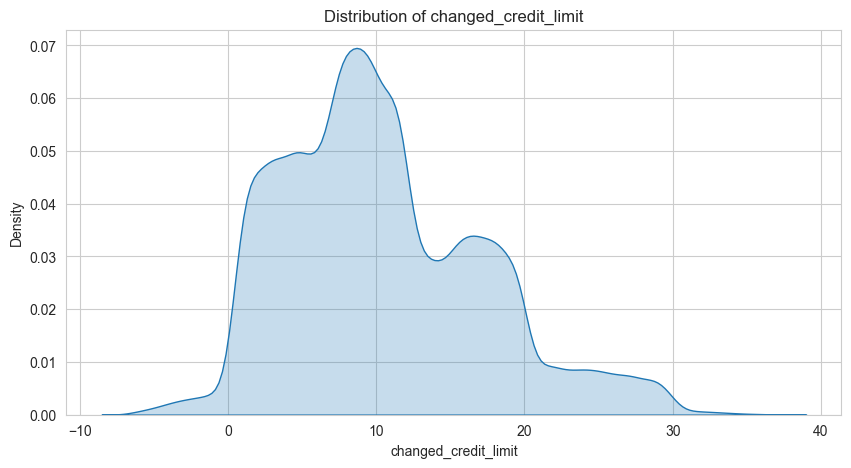

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


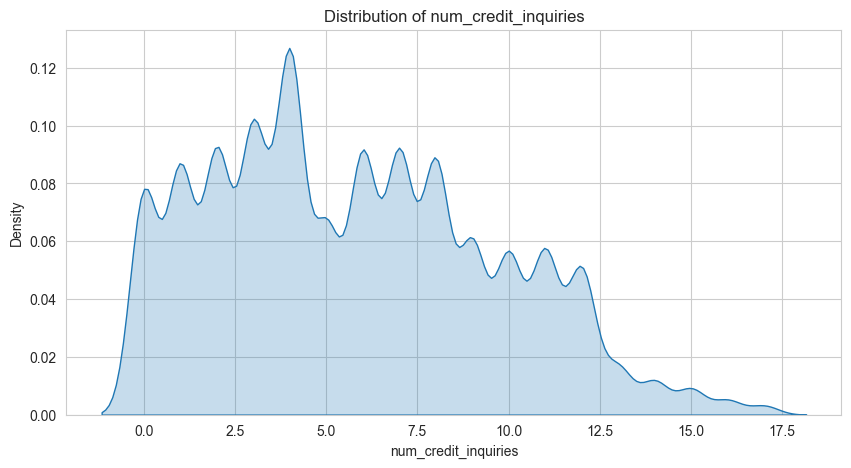

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


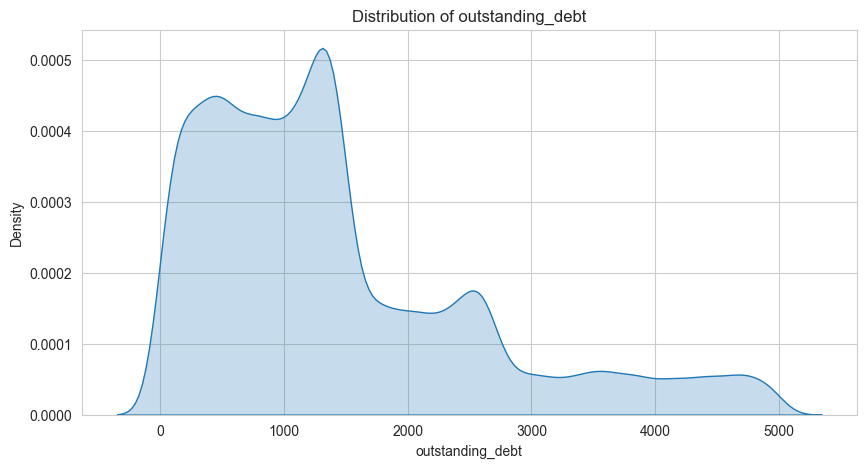

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


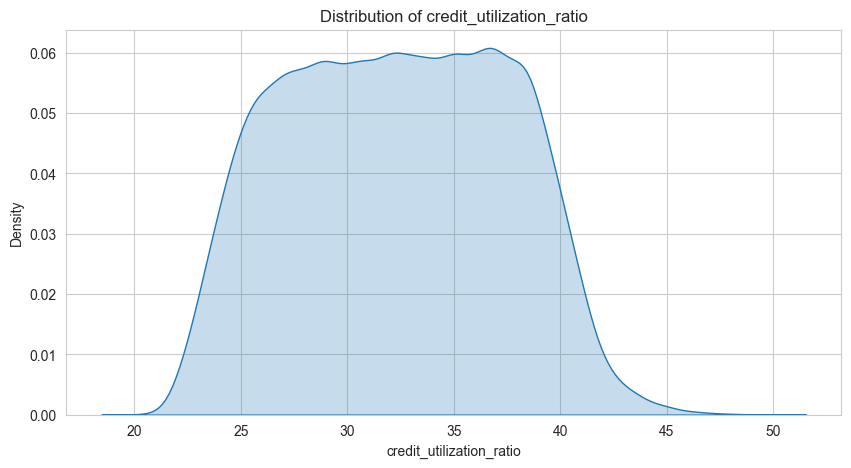

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


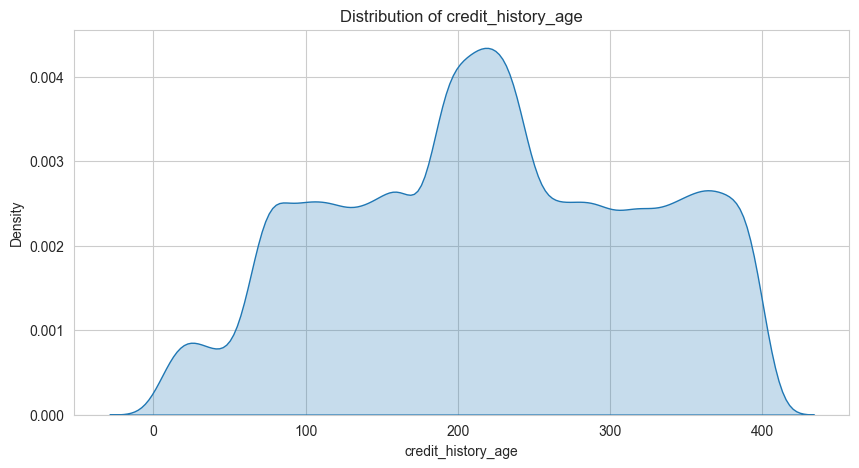

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


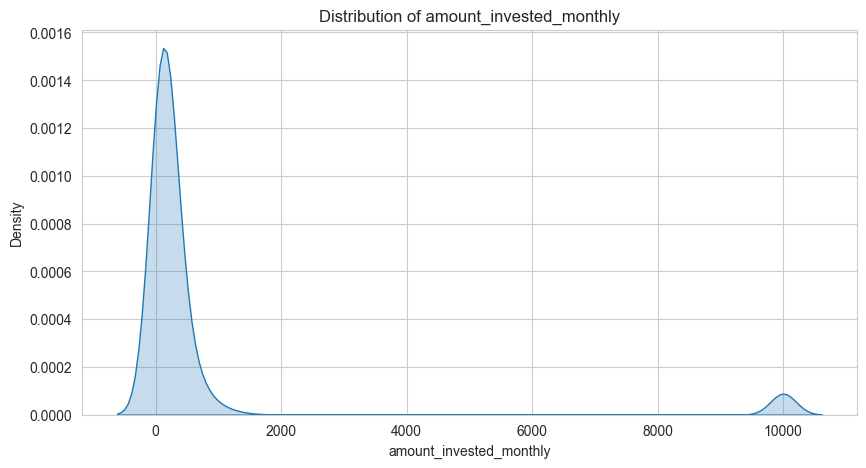

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


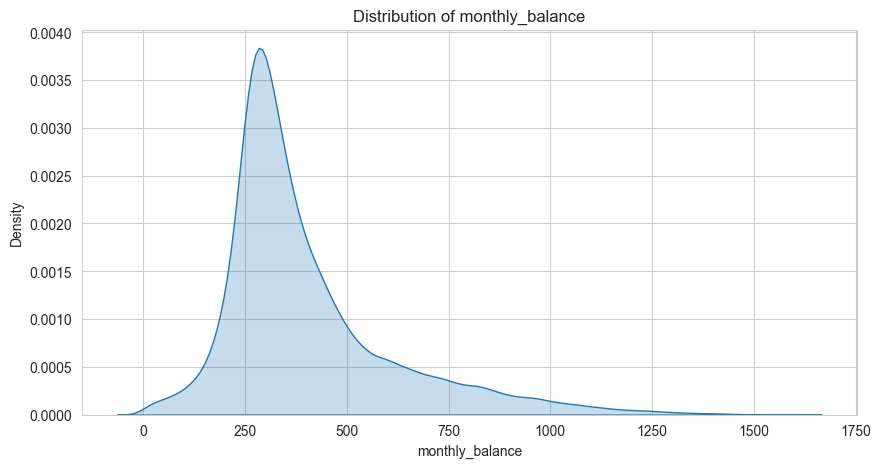

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_4822/2325871362.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


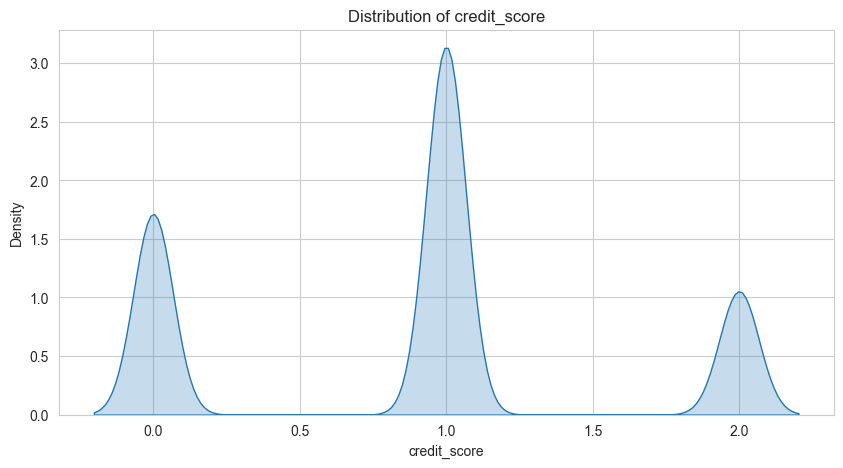

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

The boxplots let us see outliers and a rough image of the distribution at a quick glance. The KDE plots allow us to visualize the distribution more clearly.

Tota_emi_per_month, monthly_balance, and amount_invested_monthly have extreme outliers. Robust Scalar would be helpful here to rein them in. Other columns are mostly normally distributed with outliers which are not too extreme. We can use Standard Scalar for those. We will be using Random Forest algorithms first, so we can scale after that. Random Forest algorithms can operate well without scaling. Scaling will be useful for any neural network algorithms we might utilize.

In [15]:
df['credit_score'].value_counts(normalize = True)

credit_score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

The distribution of our y or 'target' variable is unbalanced. This is something to keep in mind, and maybe a use case for SMOTE.

In [16]:
df.type_of_loan.unique()

array(["['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']",
       "['Credit-Builder Loan']",
       "['Auto Loan', 'Auto Loan', 'Not Specified']", ...,
       "['Home Equity Loan', 'Auto Loan', 'Auto Loan', 'Auto Loan']",
       "['Payday Loan', 'Student Loan', 'Mortgage Loan', 'Not Specified']",
       "['Personal Loan', 'Auto Loan', 'Mortgage Loan', 'Student Loan', 'Student Loan']"],
      dtype=object)

In [17]:
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

for loan_type in unique_loan_types:
    clean_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    df[clean_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

The type of loan column can be useful for our analysis as having more or less loans can affect credit score. Additionally, certain loan types might be a clue as to what the individual's credit score is. i.e. an individual purchasing a house might be older and better off financially than a fresh graduate with a student loan.

In [18]:
# Dropping columns irrelevant to our analysis, such as ssn (security-issue!), name, etc.

df = df.drop(['id', 'customer_id', 'name', 'ssn', 'type_of_loan'], axis=1)